# IMPORTING PACKAGES

In [3]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt

# IMPORTING DATAFRAME

In [4]:
df=pd.read_csv('match.csv')
mapping={'True':'RADIANT','False':'DIRE'}
df =df.astype({"radiant_win": str})
df=df.replace({'radiant_win': mapping})



# FUNCTION NUMBER 1 (DIRE WINS VS RADIANT WINS)

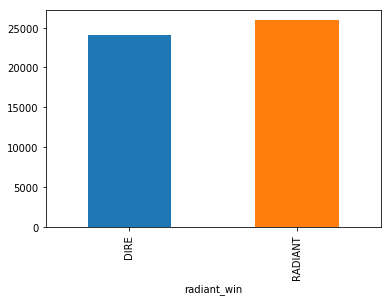

In [5]:
dup_df1=df
 
#GROUPING THE TABLE   
dup_df1_groupby=dup_df1.groupby('radiant_win')
dup_df1_groupby.first()
 
#FINDING THE COUNT OF THE TABLE
dup1_final=dup_df1_groupby.size()
    
#PLOTTING A BAR GRAPH
dup1_final.plot.bar()
    

# FUNCTION NUMBER 2 (DETAILS OF HIGHEST DURATION GAME)

In [6]:
dup_df2=df
#FINDING THE MAXIMUM VALUE
df2=dup_df2[dup_df2['duration']==dup_df2['duration'].max()]
print(df2)
    

      match_id  start_time  duration  tower_status_radiant  tower_status_dire  \
9946      9946  1447432499     16037                     0               1926   

      barracks_status_dire  barracks_status_radiant  first_blood_time  \
9946                    51                        0               222   

      game_mode radiant_win  negative_votes  positive_votes  cluster  
9946         22        DIRE               0               2      188  


# FUNCTION NUMBER 3 (DETAILS OF LEAST DURATION GAME)

In [9]:
dup_df3=df
#FINDING THE MINIMUM VALUE
df3=dup_df3[dup_df3['duration']==dup_df3['duration'].min()]
print(df3)

       match_id  start_time  duration  tower_status_radiant  \
31438     31438  1447625450        59                  2047   

       tower_status_dire  barracks_status_dire  barracks_status_radiant  \
31438               2047                    63                       63   

       first_blood_time  game_mode radiant_win  negative_votes  \
31438                 0         22        DIRE               0   

       positive_votes  cluster  
31438               0      123  


# FUNCTION NUMBER 4 (MEAN TOWER AND BARRACKS STATUS AFTER THE                                              GAME)

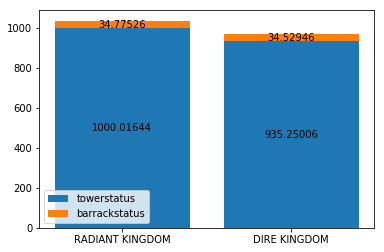

In [8]:
#STACKED BAR GRAPH FUNCTION
def stacked_bar(data, series_labels, category_labels=None, 
                show_values=False, value_format="{}", y_label=None, 
                grid=True, reverse=False):


    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i]))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")
                

                

dup_df4=df
df5=dup_df4.describe()
 
#COPYING THE REQUIRED COLUMNS INTO A DATAFRAME
new = df5[['tower_status_radiant', 'barracks_status_radiant', 'tower_status_dire','barracks_status_dire']].copy()

#COPYING VALUES OF CELLS 
data=[[new.at['mean','tower_status_radiant'],new.at['mean','tower_status_dire']],[new.at['mean','barracks_status_radiant'],new.at['mean','barracks_status_dire']]]
series=["towerstatus","barrackstatus"]
category=["RADIANT KINGDOM","DIRE KINGDOM"]
 
#PLOTTING A STACKBAR GRAPH
stacked_bar(data, series, category_labels=category, 
                show_values=True, value_format="{}", y_label=None, 
                grid=False, reverse=False)

# FUNCTION NUMBER 5 (POSTIVE VS NEGATIVE VOTES)

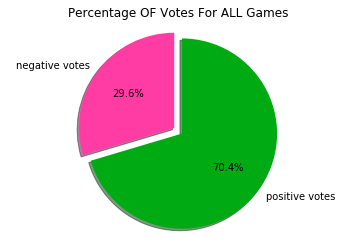

In [7]:

df6=df

#FILLING NAN WITH 0
df6["negative_votes"].fillna(0, inplace = True)

#FINDING NUMBER OF VOTES
Total_negative_votes= sum(df6.negative_votes)
Total_positive_votes=sum(df6.positive_votes)

#PLOTTING A PIECHART
total=[Total_negative_votes,Total_positive_votes]
labels=["negative votes","positive votes"]
colors=["#ff3ca3","#00aa13"]
explode=(0.1, 0)
plt.pie(total,labels=labels,explode=explode, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)


plt.axis('equal')

plt.title("Percentage OF Votes For ALL Games")
plt.show()
